# 5大必知的图算法，附Python代码
原文链接:https://www.kaggle.com/mlwhiz/top-graph-algorithms


## 1:连通分量  
![三个连通分量](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279405951/1568178422946_sduW2NvLRf.jpg)  
将上图中的连通分量算法近似看做一种硬聚类算法，该算法旨在寻找相关数据的簇类。  
举一个例子：假设拥有连接世界上任意城市的路网数据，我们需要找出世界上所有的大陆，以及他们所包含的城市。我们该如何实现这一目标呢？  
基于BFS/DFS的连通分量算法能够达成这一目的，（深度优先和广度优先）.   
接下来，我们使用Networkx 实现这一算法。  


**代码**     
使用python中的Networkx模块来创建和分析图数据库。如下面的示意图所示，图中包含了各个城市和它们之间距离的信息。    
![示意图](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279405951/1568178786365_KIIKOHqQ8h.jpg)  首先，创建边的列表，料表中每个元素包含两个城市的名称，以及它们之间的距离。 

  

In [5]:
edgelist = [['Mannheim', 'Frankfurt', 85], ['Mannheim', 'Karlsruhe', 80], ['Erfurt', 'Wurzburg', 186], ['Munchen', 'Numberg', 167], ['Munchen', 'Augsburg', 84], ['Munchen', 'Kassel', 502], ['Numberg', 'Stuttgart', 183], ['Numberg', 'Wurzburg', 103], ['Numberg', 'Munchen', 167], ['Stuttgart', 'Numberg', 183], ['Augsburg', 'Munchen', 84], ['Augsburg', 'Karlsruhe', 250], ['Kassel', 'Munchen', 502], ['Kassel', 'Frankfurt', 173], ['Frankfurt', 'Mannheim', 85], ['Frankfurt', 'Wurzburg', 217], ['Frankfurt', 'Kassel', 173], ['Wurzburg', 'Numberg', 103], ['Wurzburg', 'Erfurt', 186], ['Wurzburg', 'Frankfurt', 217], ['Karlsruhe', 'Mannheim', 80], ['Karlsruhe', 'Augsburg', 250],["Mumbai", "Delhi",400],["Delhi", "Kolkata",500],["Kolkata", "Bangalore",600],["TX", "NY",1200],["ALB", "NY",800]]

然后，使用Networkx创建图：

In [3]:
import networkx as nx

In [6]:
g = nx.Graph()
for edge in edgelist:
    g.add_edge(edge[0], edge[1], weight = edge [2])

现在，我们想从这张图中找出不同的大陆及其包含城市。我们可以使用连通分量算法来执行此操作：

In [7]:
for i, x  in enumerate(nx.connected_components(g)):
    print('CC'+str(i)+':',x)
#输出结果对应上面的3个连通分量

CC0: {'Erfurt', 'Augsburg', 'Karlsruhe', 'Kassel', 'Munchen', 'Frankfurt', 'Mannheim', 'Wurzburg', 'Numberg', 'Stuttgart'}
CC1: {'Mumbai', 'Kolkata', 'Delhi', 'Bangalore'}
CC2: {'ALB', 'NY', 'TX'}


从结果可以看出，只需要使用边缘和顶点，我们就能在数据中心找到不同的连通分量。
这个算法非常的简单

##  应用场景
1. 零售： 很多客户使用大量账户，可以利用连通分量算法寻找数据集中的不同簇类。假设使用相同信用卡的客户 ID 存在连边（edges），或者将该条件替换为相同的住址，或者相同的电话等。一旦我们有了这些连接的边，就可以使用连通分量算法来对客户 ID 进行聚类，并对每个簇类分配一个家庭 ID。然后，通过使用这些家庭 ID，我们可以根据家庭需求提供个性化建议。此外，通过创建基于家庭的分组功能，我们还能够提高分类算法的性能。
2. 财务：我们可以利用这些家庭 ID 来识别金融欺诈。如果某个账户曾经有过欺诈行为，那么它的关联帐户很可能发生欺诈行为。

## 2. 最短路径
继续第一节中的例子，我们拥有了德国的城市群及其相互距离的图表。为了计算从法兰克福前往慕尼黑的最短路径，我们需要用到 Dijkstra 算法。Dijkstra 是这样描述他的算法的：  
从鹿特丹到格罗宁根的最短途径是什么？或者换句话说：从特定城市到特定城市的最短路径是什么？这便是最短路径算法，而我只用了二十分钟就完成了该算法的设计。 一天早上，我和未婚妻在阿姆斯特丹购物，我们逛累了，便在咖啡馆的露台上喝了一杯咖啡。而我，就想着我能够做到这一点，于是我就设计了这个最短路径算法。正如我所说，这是一个二十分钟的发明。事实上，它发表于1959年，也就是三年后。它之所以如此美妙，其中一个原因在于我没有用铅笔和纸张就设计了它。后来我才知道，没有铅笔和纸的设计的一个优点就是，你几乎被迫避免所有可避免的复杂性。最终，这个算法让我感到非常惊讶，而且也成为了我名声的基石之一。

——Edsger Dijkstra
于2001年接受ACM通讯公司 Philip L. Frana 的采访时的回答


----------------
万幸的是，networkx这个包里面，已经有这个函数了。我们来试试  
代码如下：  

In [13]:
print(nx.shortest_path(g, 'Stuttgart', 'Frankfurt',weight = 'weight'))
#最短的路径应该为

['Stuttgart', 'Numberg', 'Wurzburg', 'Frankfurt']


In [15]:
print(nx.shortest_path_length(g, 'Stuttgart','Frankfurt',weight='weight'))
#最短路径的距离为：
#这也太容易了吧，我的内心毫无波动，设置还有点想吃瓜

503


使用以下的命令可以找到所有对之间的最短路径

In [16]:
for x in nx.all_pairs_dijkstra_path(g, weight = 'weights'):
    print(x)

('Mannheim', {'Mannheim': ['Mannheim'], 'Frankfurt': ['Mannheim', 'Frankfurt'], 'Karlsruhe': ['Mannheim', 'Karlsruhe'], 'Kassel': ['Mannheim', 'Frankfurt', 'Kassel'], 'Wurzburg': ['Mannheim', 'Frankfurt', 'Wurzburg'], 'Augsburg': ['Mannheim', 'Karlsruhe', 'Augsburg'], 'Munchen': ['Mannheim', 'Frankfurt', 'Kassel', 'Munchen'], 'Erfurt': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg', 'Stuttgart']})
('Frankfurt', {'Frankfurt': ['Frankfurt'], 'Mannheim': ['Frankfurt', 'Mannheim'], 'Kassel': ['Frankfurt', 'Kassel'], 'Wurzburg': ['Frankfurt', 'Wurzburg'], 'Karlsruhe': ['Frankfurt', 'Mannheim', 'Karlsruhe'], 'Munchen': ['Frankfurt', 'Kassel', 'Munchen'], 'Erfurt': ['Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Frankfurt', 'Wurzburg', 'Numberg'], 'Augsburg': ['Frankfurt', 'Mannheim', 'Karlsruhe', 'Augsburg'], 'Stuttgart': ['Frankfurt', 'Wurzburg', 'Numberg', 'Stuttgar

**应用**  
Dijkstra 算法的变体在 Google 地图中广泛使用，用于计算最短的路线。

## 3 最小生成树
假设我们在水管工程公司或者互联网光纤公司工作，我们需要使用最小的电线（或者管道）连接图标中的所有城市。我们如何做到这一点  
![最小生成树](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279405951/1568180096645_zMeaTo3aYT.jpg)  

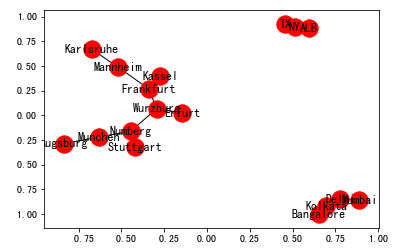

In [20]:
nx.draw_networkx(nx.minimum_spanning_tree(g))
# nx.minimum_spanning_tree(g) 返回距离returns a instance of type graph


应用

1. 最小生成树在网络设计中有着最直接的应用，包括计算机网络，电信网络，运输网络，供水网络和电网。（最小生成树最初就是为此发明的）
2. 最小生成树可用于求解旅行商问题的近似解
3. 聚类——首先构造最小生成树，然后使用类间距离和类内距离来设定阈值，从而破坏最小生成树中的某些连边，最终完成聚类的目的
4. 图像分割——首先在图形上构建最小生成树，其中像素是节点，像素之间的距离基于某种相似性度量（例如颜色，强度等），然后进行图的分割。

## 4、 网页排序（PageRank）
![PageRank](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279405951/1568180622682_E6LGNNpU3p.jpg)  
网页排序是为谷歌提供长期支持的页面排序算法。根据输入和输出链接的数量和质量，该算法对每个页面进行打分。  
我们用Facebook的数据，（下载链接会在后面给出）
首先，利用facebook用户之间的链接，我们使用一下的方法创建图  


In [22]:
# reading the dataset
#!ls /home/tianchi/myspace/机器学习经典算法/facebook-combined.txt
fb = nx.read_edgelist('/home/tianchi/myspace/机器学习经典算法/facebook-combined.txt', create_using = nx.Graph(), nodetype = int)

In [23]:
fb


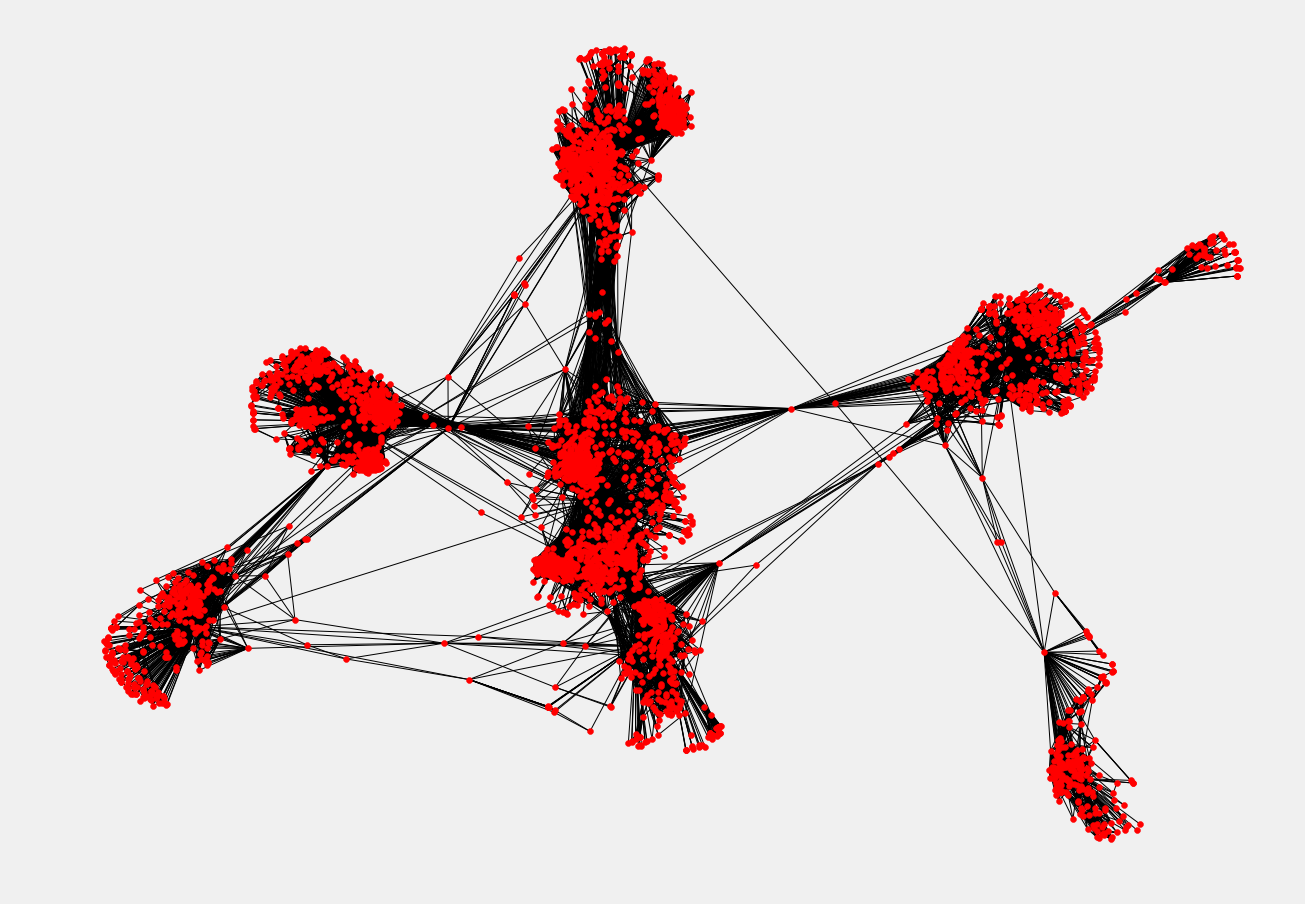

In [26]:
pos = nx.spring_layout(fb)
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(fb, pos, with_labels = False, node_size = 35)
plt.show()
#我透你个猴子，真好看
#别问，问就是我牛逼

现在，我们想要找到具有高影响力的用户。直观上来讲，Pagerank 会给拥有很多朋友的用户提供更高的分数，而这些用户的朋友反过来会拥有很多朋友。

In [27]:
pageranks = nx.pagerank(fb)
print(pageranks)

{0: 0.006289602618466542, 1: 0.00023590202311540972, 2: 0.00020310565091694562, 3: 0.00022552359869430617, 4: 0.00023849264701222462, 5: 0.00020234812068977806, 6: 0.0001800186713563964, 7: 0.00026267667111515796, 8: 0.00023737300152657913, 9: 0.0006001572433028073, 10: 0.00013504865958890368, 11: 5.2591423276218314e-05, 12: 5.2591423276218314e-05, 13: 0.0003306419576230765, 14: 0.0002886439803414604, 15: 5.2591423276218314e-05, 16: 0.0001332430576919805, 17: 0.00026000987429524483, 18: 5.2591423276218314e-05, 19: 0.0003806431405636216, 20: 0.00029297537600066995, 21: 0.0006928319433106632, 22: 0.00016385672869526863, 23: 0.00040432634048828404, 24: 0.00022824011209266322, 25: 0.000800412660519768, 26: 0.0006922746319436039, 27: 9.900477693053426e-05, 28: 0.0002552192093758929, 29: 0.00019154955480122377, 30: 0.00021219645131216383, 31: 0.0002993619581806596, 32: 0.0001478893714943048, 33: 9.172093610965164e-05, 34: 9.248443396698941e-05, 35: 7.353643512923525e-05, 36: 0.00018502677914

接来下，我们需要排序

In [28]:
import operator
sorted_pagerank = sorted(pageranks.items(), key = operator.itemgetter(1), reverse = True)
print(sorted_pagerank)

[(3437, 0.007614586844749603), (107, 0.006936420955866114), (1684, 0.0063671621383068295), (0, 0.006289602618466542), (1912, 0.0038769716008844974), (348, 0.0023480969727805783), (686, 0.0022193592598000193), (3980, 0.002170323579009993), (414, 0.0018002990470702262), (698, 0.0013171153138368807), (483, 0.0012974283300616082), (3830, 0.0011844348977671688), (376, 0.0009014073664792464), (2047, 0.000841029154597401), (56, 0.0008039024292749443), (25, 0.000800412660519768), (828, 0.0007886905420662135), (322, 0.0007867992190291396), (475, 0.0007853586142469624), (428, 0.0007800171933479684), (67, 0.0007724556453836683), (3596, 0.0007657185486816217), (2313, 0.0007541077515661327), (713, 0.0007493481050218991), (271, 0.0007457889296014823), (563, 0.0007402839803830178), (917, 0.0007331559412352088), (119, 0.000731907259320906), (3545, 0.0007271573982528102), (3938, 0.0007266014687561135), (277, 0.0007191102550992672), (1888, 0.0007117172673725058), (1800, 0.0006984646532952207), (3604, 0.

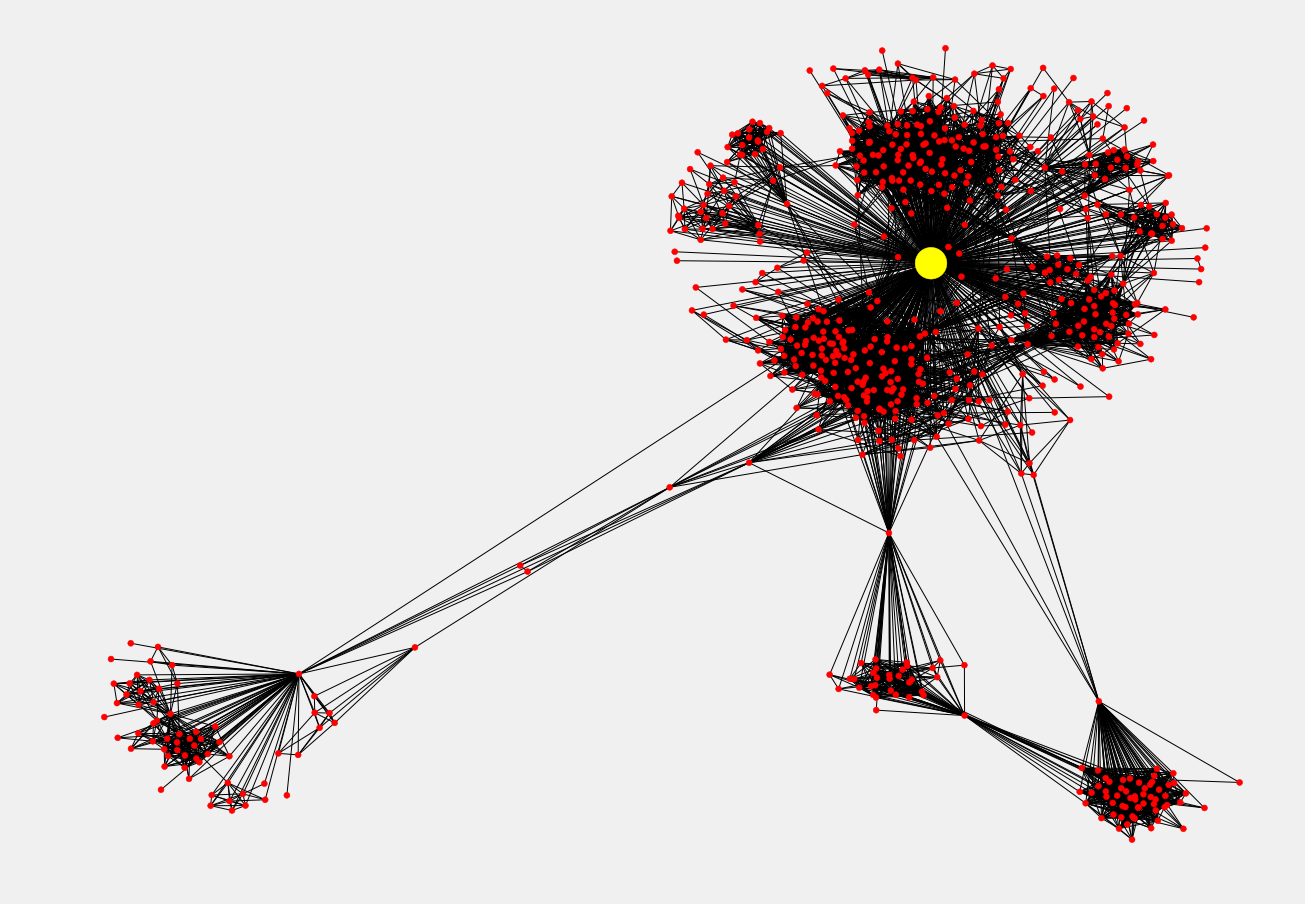

In [29]:
#将最牛逼的，影响力最大的用户可视化

first_degree_connected_nodes = list(fb.neighbors(3437))
second_degree_connected_nodes = []
for x in first_degree_connected_nodes:
    second_degree_connected_nodes+=list(fb.neighbors(x))
second_degree_connected_nodes.remove(3437)
second_degree_connected_nodes = list(set(second_degree_connected_nodes))
subgraph_3437 = nx.subgraph(fb,first_degree_connected_nodes+second_degree_connected_nodes)
pos = nx.spring_layout(subgraph_3437)
node_color = ['yellow' if v == 3437 else 'red' for v in subgraph_3437]
node_size =  [1000 if v == 3437 else 35 for v in subgraph_3437]
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(subgraph_3437, pos, with_labels = False, node_color=node_color,node_size=node_size )
plt.show()

**应用**
1. 已被用于根据引文寻找最具影响力的论文
2. 已被谷歌用于网页排名
3. 它可以对推文进行排名，其中，用户和推文作为网络的节点。如果用户 A 跟随用户 B，则在用户之间创建连边；如果用户推文或者转发推文，则在用户和推文之间建立连边。
4. 用于推荐系统

## 5、 中心性度量
1. 介数中心性：拥有最多朋友的用户很重要，而起到桥梁作用、将一个领域和另一个领域进行连接的用户也很重要，因为这样可以让更多的用户看到不同领域的内容。介数中心性衡量了特定节点出现在两个其他节点之间最短路径集的次数。
2. 度中心性：即节点的连接数。

(-0.31904940141213911,
 0.31689270745783221,
 -1.0925954132643154,
 0.89413029037320646)

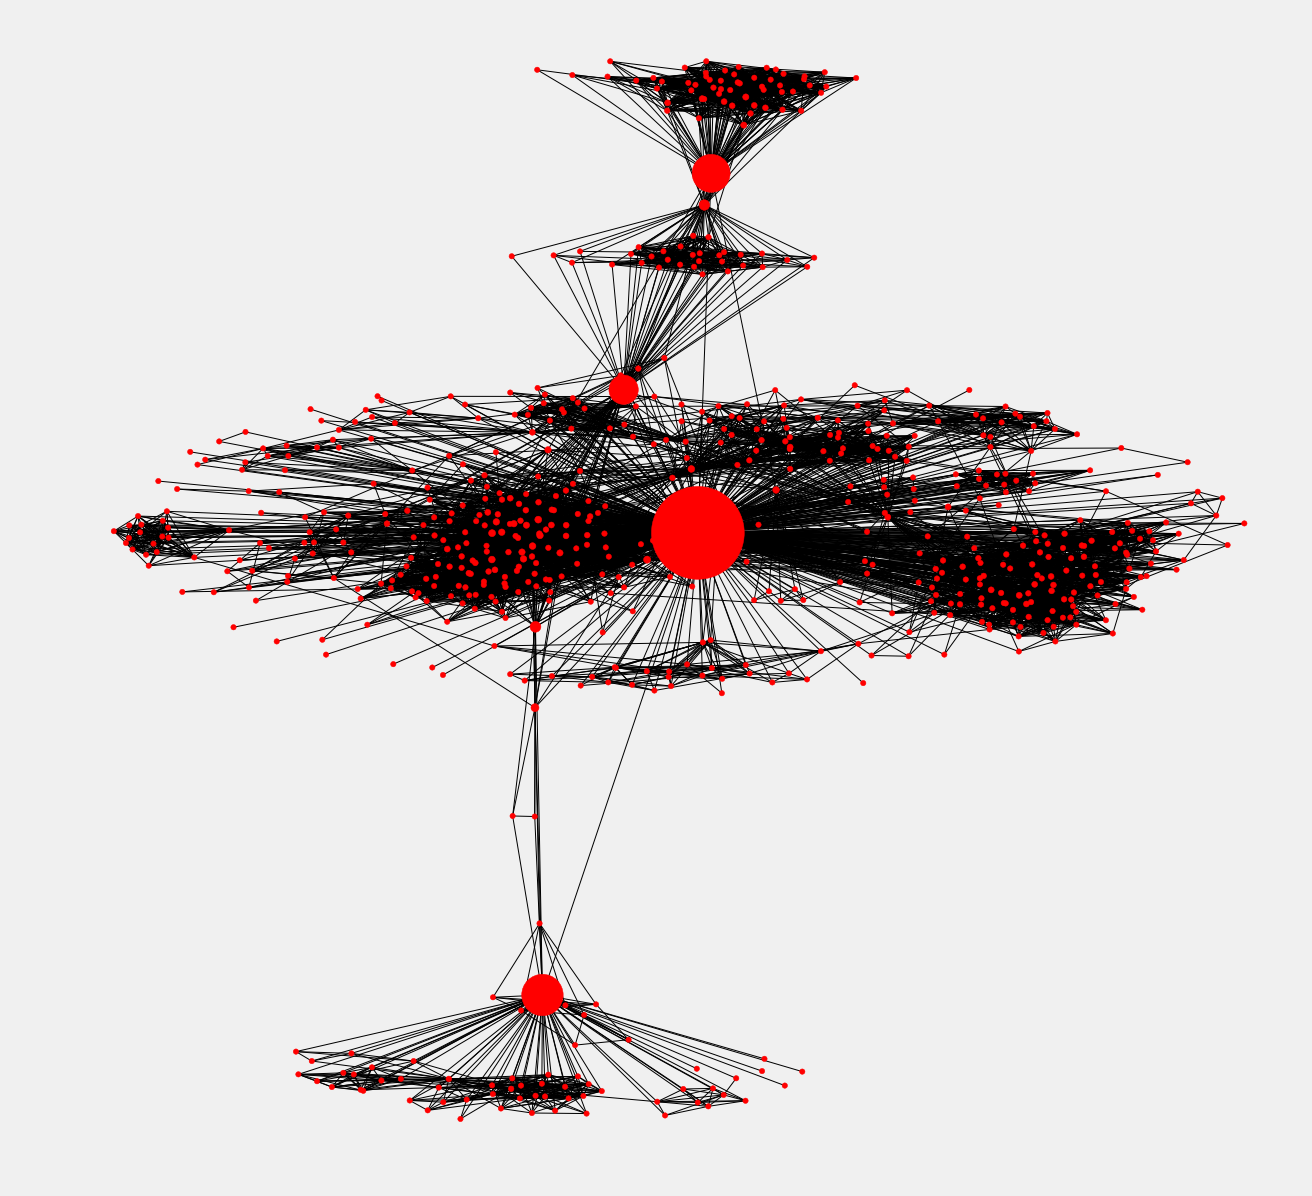

In [30]:
pos = nx.spring_layout(subgraph_3437)
betweennessCentrality = nx.betweenness_centrality(subgraph_3437,normalized=True, endpoints=True)
node_size =  [v * 10000 for v in betweennessCentrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(subgraph_3437, pos=pos, with_labels=False,
                 node_size=node_size )
plt.axis('off')

如上图所示，节点的尺寸大小和介数中心性的大小成正比。具有较高介数中心性的节点被认为是信息的传递者，移除任意高介数中心性的节点将会撕裂网络，将完整的图打碎成几个互不连通的子图。